# 정규분포

$$   
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}  \exp\left\{ - \frac{ (x-\mu)^2 }{ 2 \sigma^2} \right\}
$$
scipy.stats.norm https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [12]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats
from scipy.stats import norm  # normal distribution, 정규분포

import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False

### 정규분포 그래프 pdf（probability density function）

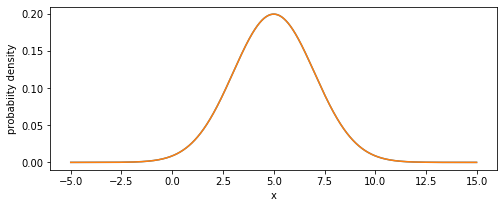

In [2]:
m = 5   # mean
std = 2 # standard deviation
x = np.arange( -5, 15, 0.01)
y = norm.pdf(x, loc=m, scale=std)
#y = (1 / np.sqrt(2 * np.pi * std*std ) ) * np.exp(-(x-m) ** 2 / (2 * std*std) ) #정규분포의 식

fig = plt.subplots(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('probabiity density')
plt.plot(x,y)

#### 백분위 점과 확률의 계산
백분위점pp:percent point)$z_{\alpha}$ 을 구하기 위해서는，$1-\alpha$를 ppf ( percent point function )에 제공한다.<br>
확률을 구하기 위해서는，백분위점$z_{\alpha}$를 cdf (cumulative density function)에 제공한다.<br>
또한, 표준정규분포(평균값 $m = 0$,  표준편차 $\sigma=1$ ）를 대상으로 한다<br>

#### 단측의 경우
표준정규분포$N(0,1)$의 그래프에서，$z_{\alpha} \le x < \infty$ 의 확률 $\alpha$（면적）을 사용자가 제공한다. 이 때,  
$- \infty < x \le z_{\alpha} $의 확률(면적)은 $1-\alpha$가 된다.
이 값이 scipy.stats.norm.ppf 에 주어지면，$z_{\alpha}$가 구해진다.

In [3]:
m = 0
std = 1
alpha = 0.05
prob = 1 - alpha
z_alp = norm.ppf(prob, loc=m, scale=std)
print('percent point＝', z_alp) #

percent point＝ 1.6448536269514722


isf (Inverse survival function，생존함수의 역함수）를 이용하면，1-alpha의 계산이 불필요하고，위와 동일한 백분위점을 얻는다.

In [4]:
z_alp2 = norm.isf(alpha, loc=m, scale=std)
print('isf를 이용한 percent point', z_alp2)

isf를 이용한 percent point 1.6448536269514729


In [5]:
m = 0
std = 1.0
z_alp = 1.96
prob = norm.cdf(z_alp, loc=m, scale=std)
print('확률＝',prob)

확률＝ 0.9750021048517795


#### 양측의 경우
구간 [a b]의 확률을 구한다.
1. $- \infty < x \le z_{b} $의 확률 $P_a$를 구한다  
2. $- \infty < x \le z_{a} $의 확률 $P_b$를 구한다
3. $P_a - P_b$를 계산

In [6]:
za = 1.65
zb = -1.65
pa = norm.cdf(za, loc=0, scale=1) # loc is mean
pb = norm.cdf(zb, loc=0, scale=1) # scale is standard deviation
p = pa - pb
print('p=',p)

p= 0.9010570639327038


#### 검정에서는， $\alpha$가 처음에 주어진다.
이것에 기초하여, 단측（z_alp），양측（za, zb）를 구하는 경우가 많다.  
단측의 경우는 이미 기술했다.  
양측의 경우, 정규분포가 대칭으로, 또한（za, zb）가 원점을 중심으로 좌우대칭이라는 전제가 있고, 이 경우 interval을 이용할 수 있다.<br>
아래의 예에서는，양측에 z_alp/2=0.025 가 있고, 이 두 점을 더해 0.05가 되는 것에 유의한다.

In [7]:
za,zb = norm.interval(alpha=0.95, loc=0, scale=1)
print('za=',za,'  zb=',zb)

za= -1.959963984540054   zb= 1.959963984540054


#### 정규확률변수의그래프
수치적으로 생성한 정규확률변수（정규분포를 따르는 랜덤변수）의 히스토그램을 그린다

가로축이 $x$,  세로축이 빈도（데이터수 N이 많을수록，세로축의 스케일이 커진다）<br>
・평균값을 중심으로 하는 분포가 된다<br>
・데이터가 수100 정도에서는，정규분포의 형이라고 말하지 않고，데이터수가 매우 커도，결국 이상형에 접근한다<br>
・표본평균값，표본표준오차도 데이터수가 매우 크지 않으면，실체값에 가까워지지 않는다<br>
・표준편차의 계산 x.std(ddof=1) 의 ddof=1은 "불편표준오차"를 구할 때, 즉, 1/(N-1)이라는 나눗셈을 수행한다<br>
・이 ddof를 지정하지 않으면， 1/N을 이용한 계산을 수행하고，불편은 안 된다<br>
・표준편차은 산포도의 지표가 된다

N = 100  mean = 2.081327  std = 3.401773e+00
N = 10000  mean = 2.031495  std = 2.991842e+00


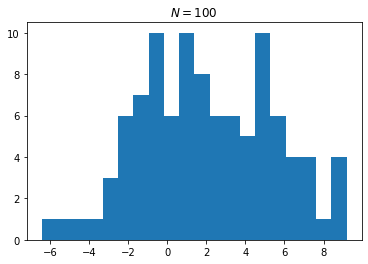

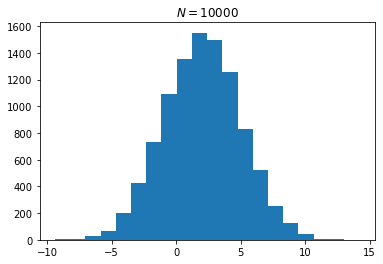

In [15]:
np.random.seed(123) # scipy와 공통, 난수생성의 재현성을 얻음

mean = 2.0 # mean, 평균값
std = 3.0  # standar deviation, 표준편차
for N in [100, 10000]:
    x = scipy.stats.norm.rvs(loc=mean, scale=std, size=N) # rvs:Random variates
    print('N = %d  mean = %f  std = %e' % (N, x.mean(), x.std(ddof=1))) # 표본의 표준오차이므로
    plt.figure()
    plt.hist(x, bins=20)
    plt.title('$N = %i$' % (N) )

if FLAG_fig: plt.savefig('fig_PROB_NormalDist_Sim.png')
plt.show()

#### 중심극한정리
균일난수를 이용하면，이 구간 [a,b]의 평균값은 $\mu = \frac{a+b}{2}$, 분산 $\sigma^2 = \frac{(b-a)^2}{12}$이다.
이 n개（몇 개의 값）의 표본평균을 N개（이것은 일정하다）발생시켜，분포를 보면，정규분포 $N(\mu, \sigma^2/n )$에 가까워진다. 여기에서는，표준정규분포로 정규화한다.
다른 분포로도 시험해보고 싶다.

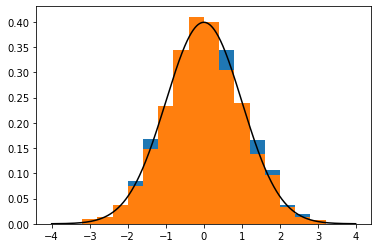

In [9]:
N = 2000
y= np.zeros(N)
for n in [5, 5000]:
    for i in range(N):
        x = scipy.stats.uniform.rvs(size=n)
        y[i] = (x.mean() - 1/2)/(np.sqrt(1/12)/np.sqrt(n))
    plt.hist(y, bins=20, range=(-4,4), density=True)

xx = np.arange(-4, 4, 0.01)
nrm = scipy.stats.norm.pdf(xx, loc=0.0, scale=1.0 ) # 표준정규분포
plt.plot(xx, nrm, c='k')

if FLAG_fig: plt.savefig('fig_PROB_NormalDist_Climt.png')
plt.show()

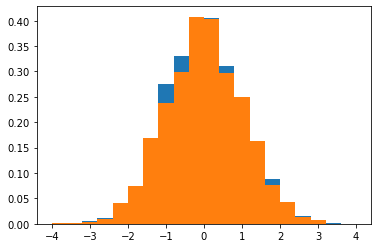

In [29]:
N = 2000
y= np.zeros(N) # N의 크기만큼 0을 가진 array를 생성.
for n in [5, 5000]:
    for i in range(N):
        x = scipy.stats.uniform.rvs(size=n) # 균등분포 난수 생성 함수.
        y[i] = (x.mean() - 1/2)/(np.sqrt(1/12)/np.sqrt(n))
    plt.hist(y, bins=20, range=(-4,4), density=True)



if FLAG_fig: plt.savefig('fig_PROB_NormalDist_Climt.png')
plt.show()

In [26]:
test = scipy.stats.uniform.rvs(size=2000)
a = test.mean()
b = test.std()
print(a,b**2, (1/12))

0.5117750260754818 0.08477876522047349 0.08333333333333333


# 포아송분포
$$
P(X=k) = \exp (-\lambda t) \frac{(\lambda t)^k}{k !}
$$
scipy.stats.poisson  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.stats import poisson
from scipy.stats import uniform

import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False

#### 확률질량함수（pmf: Probability mass function）의 그래프
이산확률변수인 경우의 호칭，연속확률변수인 경우는 확률밀도함수 (pdf: Probability density function)

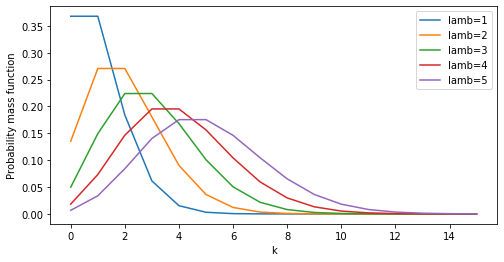

In [8]:
fig = plt.subplots(figsize=(8,4))
k = np.arange(0,16)

for lamb in range(1,6):
    p = poisson.pmf(k, lamb)
    plt.plot(k, p, label='lamb='+str(lamb))

plt.xlabel('k')
plt.ylabel('Probability mass function')
plt.legend()

if FLAG_fig: plt.savefig('fig_PROB_Poisson_pmf_Plot')
plt.show()

In [31]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 예：교통사고 문제
교통사고 평균 2.4건／일의 경우，교통사고가 2건/일이 되는 확률을 구한다.

In [9]:
lamb = 2.4
psum = 0
for k in [0, 1, 2]:
    p = poisson.pmf(k, mu=lamb)
    psum = psum + p
print('sum of p =',psum)

sum of p = 0.5697087466575105


#### 포아송 도착 모델
$$ 
  t_{arrive} = -\frac{1}{\lambda} \log_{e} P_{arrive} (T) 
$$

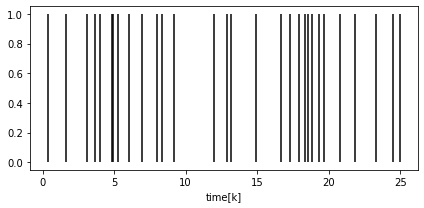

In [10]:
np.random.seed(123)

Num=30 # 　Num 명의 도착시간을 구한다
t_arrive = np.zeros(Num)
lamb = 1

sum = 0.0
for i in range(Num):
    sum = sum - (1/lamb) * np.log( uniform.rvs(size=1) )
    t_arrive[i] = sum

fig, ax = plt.subplots(figsize=(6,3))
ax.vlines(t_arrive, ymin=0, ymax=1)
ax.set_xlabel('time[k]')
plt.tight_layout() 

if FLAG_fig: plt.savefig('fig_PROB_Poisson_Arrival')
plt.show()

In [11]:
t_arrive

array([ 0.36173173,  1.61300813,  3.096468  ,  3.69191736,  4.02115924,
        4.88129069,  4.90071391,  5.27929894,  6.01132853,  6.94752223,
        8.0170282 ,  8.33304156,  9.15727229, 11.97606585, 12.89725794,
       13.20107562, 14.90212604, 16.64251721, 17.27447263, 17.90590856,
       18.36098266, 18.52417029, 18.84650547, 19.33912531, 19.66424154,
       20.7944717 , 21.81116677, 23.28842256, 24.51357118, 24.97405843])

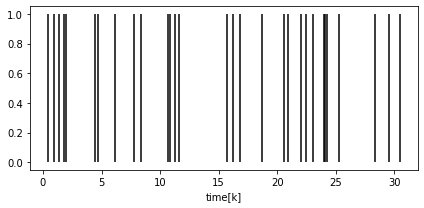

In [13]:
Num=30 # the number of arrival, Num명의 도착시간을 구한다
t_arrive = np.zeros(Num)
lamb = 1

sum = 0.0
for i in range(Num):
    sum = sum - (1/lamb) * np.log( uniform.rvs(size=1) )
    t_arrive[i] = sum

fig, ax = plt.subplots(figsize=(6,3))
ax.vlines(t_arrive, ymin=0, ymax=1)
ax.set_xlabel('time[k]')
plt.tight_layout() 

if FLAG_fig: plt.savefig('fig_PROB_Poisson_Arrival')
plt.show()